<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Grab_cut_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/statue_small.jpg

--2021-02-03 05:16:53--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/statue_small.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37094 (36K) [image/jpeg]
Saving to: ‘statue_small.jpg’

statue_small.jpg    100%[===================>]  36.22K  --.-KB/s    in 0.004s  

2021-02-03 05:16:53 (9.14 MB/s) - ‘statue_small.jpg’ saved [37094/37094]



In [3]:
original = cv2.imread('statue_small.jpg')

In [4]:
type(original)

numpy.ndarray

In [5]:
img = original.copy()

In [6]:
mask = np.zeros(img.shape[:2],np.uint8)

In [7]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [8]:
rect = (100,1,421,378)

In [9]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 3],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[ 2.80484170e-01,  2.82623970e-01,  1.11972236e-01,
          2.55871144e-01,  6.90484808e-02,  2.54304665e+02,
          1.99842904e+02,  9.86717273e+01,  2.45754520e+02,
          1.79674401e+02,  9.23697830e+01,  2.33418616e+02,
          1.82696045e+02,  9.75672181e+01,  2.38121240e+02,
          1.71121240e+02,  8.41212399e+01,  2.51829479e+02,
          1.85960685e+02,  9.85948196e+01,  1.11942372e+00,
          1.83174582e+00,  1.82605400e+00,  1.83174582e+00,
          2.10526732e+01,  1.82144563e+01,  1.82605400e+00,
          1.82144563e+01,  1.70407929e+01,  1.55724427e+01,
          1.16071671e+01,  1.29196503e+01,  1.16071671e+01,
          9.57946071e+00,  1.02522753e+01,  1.29196503e+01,
          1.02522753e+01,  1.11369158e+01,  7.27784924

In [10]:
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

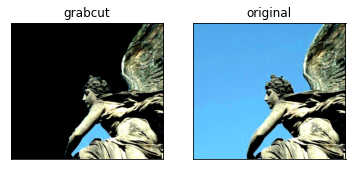

In [11]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("grabcut")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.xticks([])
plt.yticks([])

plt.show()